# Loan Approval Prediction System

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. (wikipedia)

**The major aim of this project is to predict which of the customers will have their loan approved.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
strings = list(df.dtypes[df.dtypes=='object'].index)
strings

['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [6]:
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [10]:
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data Cleaning

In [11]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

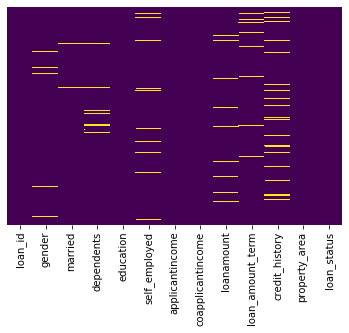

In [12]:
#heatmap showing the null values in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [7]:
df.drop(['loan_id','dependents'],axis=1,inplace =True)

In [8]:
df.head()

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,male,yes,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [9]:
#dealing with null values for categorical data
print(df['gender'].mode())

0    male
dtype: object


In [10]:
df['gender'].fillna('male', inplace = True)

In [11]:
cols = df[['married','self_employed']]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0],inplace=True)

In [12]:
#Dealing with numerical values
m_cols = df[['loanamount','loan_amount_term','credit_history']]
for i in m_cols:
    df[i].fillna(df[i].mean(axis=0),inplace = True)

In [13]:
df.isnull().sum()

gender               0
married              0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

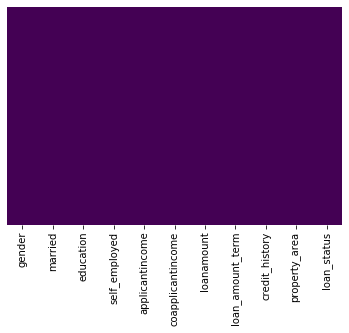

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [14]:
df.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,male,yes,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,male,yes,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,male,yes,not_graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,male,no,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


### Data Visualization

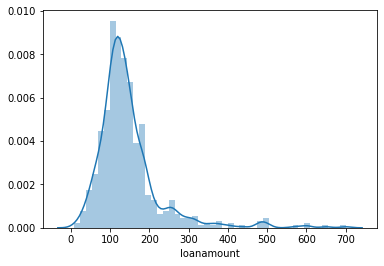

In [15]:
#distribution plot for the loan amount
sns.distplot(df['loanamount'])

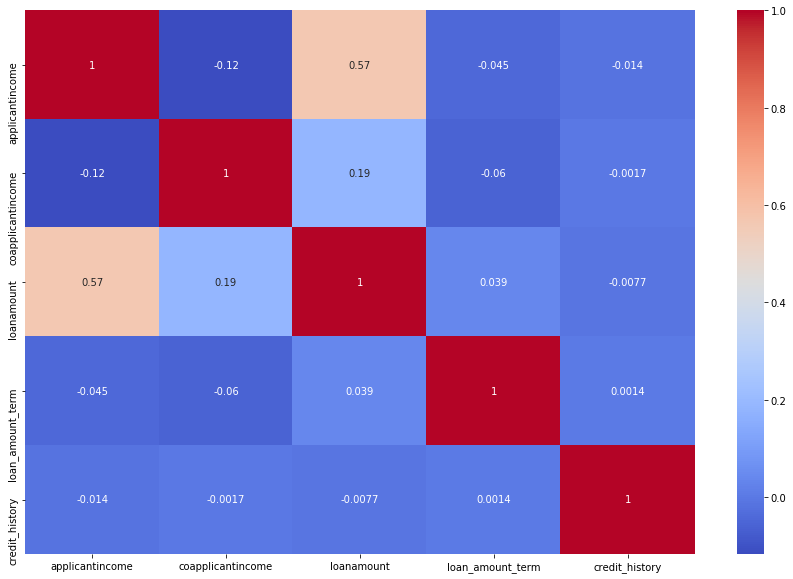

In [23]:
#heatmap showing the corrrelations between the values
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

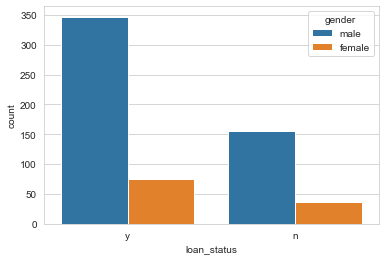

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='gender',data=df)

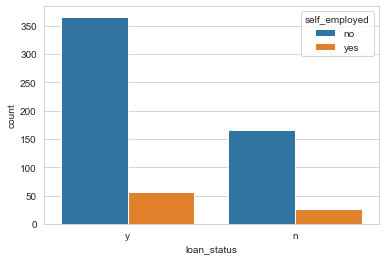

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='self_employed',data=df)

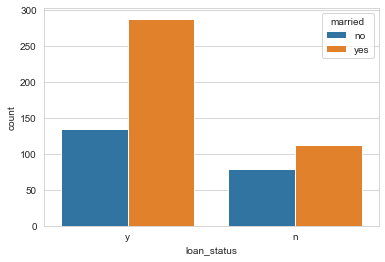

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='married',data=df)

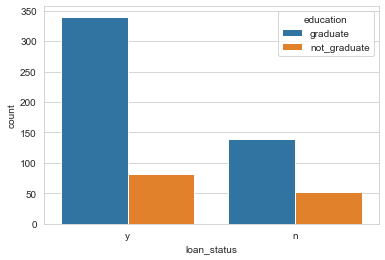

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',hue='education',data=df)

In [16]:
#encoding categorical variables

from sklearn.preprocessing import OrdinalEncoder

In [17]:
enc = OrdinalEncoder()

In [18]:
df[['gender','married','education','self_employed','property_area','loan_status']] = enc.fit_transform(df[['gender','married','education','self_employed','property_area','loan_status']])

In [19]:
df.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [20]:
df[['gender','married','education','self_employed','property_area','loan_status']] = df[['gender','married','education','self_employed','property_area','loan_status']].astype(int)

In [21]:
df.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Model selection

In [22]:
#libraries for the model selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X= df.drop('loan_status',axis=1)
y= df['loan_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Gaussian naives bayes

In [25]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
gnb_pred = gnb.predict(X_test)

#### Accuracy score


In [27]:
accuracy_score(y_test,gnb_pred)*100

78.04878048780488

#### F1 score

In [28]:
f1_score(y_test,gnb_pred)*100

85.56149732620322

#### Precision score

In [29]:
precision_score(y_test,gnb_pred)*100

77.66990291262135

#### Recall score

In [30]:
recall_score(y_test,gnb_pred)*100

95.23809523809523

### Support Vector with GridSearch

In [44]:
sv = SVC()

In [45]:
sv.fit(X_train,y_train)

C:\Users\mhide\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
sv_pred = sv.predict(X_test)

In [47]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        39
           1       0.69      1.00      0.82        84

    accuracy                           0.69       123
   macro avg       0.84      0.51      0.43       123
weighted avg       0.79      0.69      0.57       123



In [48]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [49]:
grid= GridSearchCV(SVC(),param_grid,verbose=3,refit = True)

In [50]:
grid.fit(X_train,y_train)

C:\Users\mhide\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.689, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.689, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.689, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.689, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ..................... C=1000, gamma=1, score=0.689, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.689, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.687, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.689, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.689, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.687, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.683, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [51]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [52]:
grid_predict = grid.predict(X_test)

#### Accuracy score

In [53]:
accuracy_score(y_test,grid_predict)*100

68.29268292682927

#### F1 score

In [54]:
f1_score(y_test,grid_predict)*100

81.15942028985506

#### Precision score

In [55]:
precision_score(y_test,grid_predict)*100

68.29268292682927

#### Recall score 

In [56]:
recall_score(y_test,grid_predict)*100

100.0

### Decision Trees

In [57]:
dtee =  DecisionTreeClassifier()

In [58]:
dtee.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
dee_pred = dtee.predict(X_test)

#### Accuracy score

In [60]:
accuracy_score(y_test,dee_pred)*100

70.73170731707317

#### F1 score

In [61]:
f1_score(y_test,dee_pred)*100

79.54545454545455

#### Precision score

In [62]:
precision_score(y_test,dee_pred)*100

76.08695652173914

#### Recall score

In [63]:
recall_score(y_test,dee_pred)*100

83.33333333333334

### Random Forest

In [64]:
rfc = RandomForestClassifier(n_estimators=200)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
rfc_pred = rfc.predict(X_test)

#### Accuracy score

In [67]:
accuracy_score(y_test,rfc_pred)*100

73.98373983739837

#### F1 score

In [68]:
f1_score(y_test,rfc_pred)*100

82.6086956521739

#### Precision score

In [69]:
precision_score(y_test,rfc_pred)*100

76.0

#### Recall score

In [70]:
recall_score(y_test,rfc_pred)*100

90.47619047619048

In [1]:
import pickle

In [32]:
pickle.dump(gnb,open('modell.pkl','wb'))